## Sumário:
- EDA 
- Treinamento
- Validação

## Objetivo
NCJNet é um modelo preditivo que visa sugerir cursos para o usuário, a predição é feito sob análise de notas e preferência do usuário.

## Configuração do Ambiente
É necessário o ambiente virtual para o funcionamento, para isso, realize os seguintes comandos no terminal
- /NCJNet$ pipenv shell
- /NCJNet$ pipenv install

Após isso, o ambiente está configurado com todas as bibliotecas necessárias. Para verificar, compile o código a baixo.

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    f1_score
)

# Todas as bibliotecas são necessárias para a compilação

# EDA

In [54]:
import pandas as pd
import seaborn as sns

## Criar DataFrames dos Datasets 

In [55]:
# Carregar DataFrame de clientes (customers.csv)
df = pd.read_csv('./datasets/RegistroAcompanhamento.csv') # leitura dos dados do csv

# visualizar os dados dos 5 primeiros clientes
df.head(5)

,Identificador,"""Codigo externo do registro""",Etapa,"""Data da criacao""","""Momento do ultimo ganho""","""Momento da ultima perda""","""Na mesma etapa desde""","""Codigo - Oferta de curso""","""Nome - Oferta de curso""","""Identificador da pessoa""",...,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes,Curso
0,318,"""- - -""","""- - -""","""16/06/2025 20:02""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",360,...,90,89,88,86,87,99,86,85,89,Biblioteconomia
1,317,"""- - -""","""- - -""","""16/06/2025 20:00""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",359,...,76,76,75,79,78,90,73,80,81,Biblioteconomia
2,316,"""- - -""","""- - -""","""16/06/2025 19:59""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",358,...,63,63,61,59,60,83,74,73,76,Biblioteconomia
3,315,"""- - -""","""- - -""","""16/06/2025 19:57""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",357,...,69,71,70,69,66,89,68,64,66,Biblioteconomia
4,314,"""- - -""","""- - -""","""16/06/2025 19:55""","""- - -""","""- - -""","""- - -""","""- - -""","""- - -""",356,...,71,89,63,68,87,88,89,90,91,Museologia


In [56]:
# Mostrar estrutura / schema do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Identificador                        300 non-null    object
 1    "Codigo externo do registro"        300 non-null    object
 2    Etapa                               300 non-null    object
 3    "Data da criacao"                   300 non-null    object
 4    "Momento do ultimo ganho"           300 non-null    object
 5    "Momento da ultima perda"           300 non-null    object
 6    "Na mesma etapa desde"              300 non-null    object
 7    "Codigo - Oferta de curso"          300 non-null    object
 8    "Nome - Oferta de curso"            300 non-null    object
 9    "Identificador da pessoa"           300 non-null    int64 
 10   "Codigo externo da pessoa"          300 non-null    object
 11   "Nome da pessoa"                    300 non-

### Selecionar apenas dados necessários

In [57]:
colunas_desejadas = [
	"Matematica",
	'"Portugues "', 
	"Literatura",
	"Redacao",
	"Quimica",
	"Fisica",
	"Biologia",
	"Geografia",
	"Historia",
	"Filosofia",
	"Sociologia",
	"Artes",
	'Area de Preferencia', 
	"Curso"
]

# Remover espaços dos nomes das colunas
df.columns = df.columns.str.strip()

# Verificar nomes das colunas após strip
print(df.columns.tolist())


# Agora filtrar as colunas
df_filtrado = df[colunas_desejadas]
df_filtrado.info()

['Identificador', '"Codigo externo do registro"', 'Etapa', '"Data da criacao"', '"Momento do ultimo ganho"', '"Momento da ultima perda"', '"Na mesma etapa desde"', '"Codigo - Oferta de curso"', '"Nome - Oferta de curso"', '"Identificador da pessoa"', '"Codigo externo da pessoa"', '"Nome da pessoa"', '"Nome do responsavel"', 'Atividade', '"E-mail da pessoa"', '"E-mails secundarios"', '"Telefone da pessoa"', '"Telefones secundarios"', 'CPF', '"Data de nascimento"', '"Valor da oportunidade"', '"Data da atividade"', '"Forma de ingresso"', '"Grau de instrucao"', '"Escola de origem"', '"Nota do ENEM"', '"Processo seletivo"', 'Unidade', 'Modalidade', 'Status', '"Local da oferta"', 'Canal', '"Resumo atual"', 'Objecao', '"Observacoes da perda"', 'Endereco', 'Numero', 'Bairro', 'Cidade', 'UF', 'Concorrentes', 'Probabilidade', '"[AE] Situacao de matricula"', 'Area de Preferencia', '"[AE] % de nota geral"', '"[AE] % de frequencia geral"', '"[AE] Satisfacao"', '"[AE] Qtd de lancamentos Vencidos"', 

In [58]:
df_filtrado.head(5)

,Matematica,"""Portugues """,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes,Area de Preferencia,Curso
0,82,96,98,90,89,88,86,87,99,86,85,89,Humanas,Biblioteconomia
1,80,90,89,76,76,75,79,78,90,73,80,81,Humanas,Biblioteconomia
2,65,78,80,63,63,61,59,60,83,74,73,76,Humanas,Biblioteconomia
3,70,90,88,69,71,70,69,66,89,68,64,66,Humanas,Biblioteconomia
4,74,72,69,71,89,63,68,87,88,89,90,91,Humanas,Museologia


In [59]:
#  Medidas estatísticas do DF
df_filtrado.describe()

,Matematica,"""Portugues """,Literatura,Redacao,Quimica,Fisica,Biologia,Geografia,Historia,Filosofia,Sociologia,Artes
count,300.000000,300.000000,300.000000,300.000000,300.0000,300.00000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000
mean,80.233333,77.190000,77.546667,77.336667,78.4400,79.41000,79.600000,77.813333,78.776667,78.100000,78.35000,78.823333
std,11.578100,9.577735,9.072791,9.430435,10.1609,10.61402,10.555792,8.762864,8.803320,9.097943,9.98096,10.090168
min,58.000000,58.000000,59.000000,48.000000,52.0000,50.00000,43.000000,57.000000,60.000000,59.000000,41.00000,53.000000
25%,69.000000,68.000000,71.000000,70.000000,71.0000,72.00000,72.750000,72.000000,73.750000,73.000000,72.00000,71.000000
50%,80.000000,78.000000,78.000000,77.500000,79.0000,80.00000,80.000000,79.000000,79.000000,79.000000,79.00000,79.000000
75%,90.000000,85.000000,84.000000,84.000000,86.0000,88.25000,88.000000,82.000000,84.000000,84.000000,86.00000,87.000000
max,100.000000,99.000000,99.000000,99.000000,99.0000,99.00000,99.000000,98.000000,99.000000,98.000000,99.00000,99.000000


In [60]:
# Mapeando as áreas de cada curso
df = pd.read_csv('./datasets/RegistroAcompanhamento.csv', encoding='utf-8')
df.columns = df.columns.str.strip()
df['Curso'] = df['Curso'].astype(str).str.strip()
df['Area de Preferencia'] = df['Area de Preferencia'].astype(str).str.strip()

# Corrija encoding dos nomes dos cursos e áreas
df['Curso'] = df['Curso'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
df['Area de Preferencia'] = df['Area de Preferencia'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

areas_cursos = dict(zip(df['Curso'], df['Area de Preferencia']))

""" areas_cursos = {
    'Sociologia': 'Humanas',
    'Psicologia': 'Humanas',
    'Odontologia': 'Saúde',
    'Medicina Veterinária': 'Biológicas',
    'Medicina': 'Saúde',
    'Engenharia Elétrica': 'Exatas', 
    'Engenharia da Computação': 'Tecnologia',
    'Engenharia Civil': 'Exatas',
    'Enfermagem': 'Saúde',
    'Biologia': 'Biológicas',
    'Ciência da Computação': 'Tecnologia',
    'Arquitetura e Urbanismo': 'Exatas',
    'Direito': 'Humanas',
    'Design': 'Exatas',
    'Artes Visuais': 'Artes',
    'Engenharia de Produção': 'Exatas',
    'Engenharia Mecânica': 'Exatas',
    'Engenharia Química': 'Exatas',
    'Engenharia Ambiental': 'Exatas',
    'Engenharia de Alimentos': 'Exatas',
    'Engenharia de Software': 'Tecnologia',
    'Geografia': 'Humanas',
    'Filosofia': 'Humanas',
    'Química': 'Exatas',
    'Física': 'Exatas',
    'Matemática': 'Exatas',
    'Letras': 'Linguagens',
    'Dança': 'Artes',
    'Música': 'Artes',
    'Teatro': 'Artes',
    'Artes Cênicas': 'Artes',
    'Artes Plásticas': 'Artes',
    'Cinema': 'Artes',
    'Sistemas da Informação': 'Tecnologia',
    'Agronomia': 'Biológicas',
    'História': 'Humanas',
    'Ciências Sociais': 'Humanas',
    'Serviço Social': 'Humanas',
    'Educação Física': 'Saúde',
    'Relações Internacionais': 'Humanas',
    'Jornalismo': 'Comunicação',
    'Publicidade e Propaganda': 'Comunicação',
    'Relações Públicas': 'Comunicação',
    'Marketing': 'Comunicação',
    'Administração': 'Humanas',
    'Farmácia': 'Biológicas',
    'Biomedicina': 'Biológicas',
    'Nutrição': 'Biológicas',
    'Fisioterapia': 'Saúde',
    'Fonoaudiologia': 'Saúde',
    'ADS': 'Tecnologia',
    'Ciência de Dados': 'Tecnologia',
    'Linguística': 'Linguagens',
    'Pedagogia': 'Humanas',
    'Engenharia Florestal': 'Biológicas',
    'Moda': 'Artes',
    'Design Grafico': 'Artes',
    'Design de Interiores': 'Artes',
    'Museologia': 'Humanas',
    'Gestão Ambiental': 'Exatas',
    'Biblioteconomia': 'Humanas'
} """
len(areas_cursos)

60

## Dicionários por área

In [61]:
areas_unicas = df_filtrado['Area de Preferencia'].unique()
utils = {}
modelos_por_area = {
    areas_unicas[0].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[1].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[2].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[3].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[4].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[5].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[6].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        },
    areas_unicas[7].strip(): {
        "model": None,
        "acc": -float('inf'),
        "true_labels": None,
        "predict_labels": None,
        "predict_proba": None
        }
}

## Features e transformação dos dados

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np
import xgboost as xgb

# Features (X) = notas por disciplina
feature_cols = ['Matematica', '"Portugues "', 'Literatura', 'Redacao', 'Quimica', 'Fisica', 'Biologia', 'Geografia', 'Historia', 'Filosofia', 'Sociologia', 'Artes','Area de Preferencia']

encoder_area_pref_geral = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_area_pref_geral.fit(df_filtrado[['Area de Preferencia']]) # Fit no dataset COMPLETO para todas as categorias

scaler = StandardScaler()  # inicializa para normalizar os dados

for area in areas_unicas:
    # Filtrar o DataFrame para a área atual
    df_area = df_filtrado[df_filtrado['Area de Preferencia'] == area].copy()
    
    # Features (X) = notas por disciplina
    X = df_area[feature_cols].copy()
    X_numeric = X.drop(columns=['Area de Preferencia'])
    
    # Rótulo (y) = curso que o aluno faz
    y_categorico = df_area["Curso"]

    # Transformar a variável curso para formato numérico
    label_curso = LabelEncoder()
    y = label_curso.fit_transform(y_categorico)
    
    utils[area.strip()] = {
        'X': X_numeric,
        'y': y,
        'label': label_curso
    }

# Treinamento

## Treinamento com Random Forest

In [63]:
kf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
K_TOP = 3
for area in areas_unicas:
    y_labels_rf = []
    y_predict_rf = []
    y_proba_rf = [] 

    # acc_scores = []
    top_k_accuracies_per_fold = [] # Para armazenar os scores de NCG por fold
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True,max_depth=20,criterion='gini')
    best_model = -float('inf')
    print(area)
    # Treinar o modelo Random Forest com validação cruzada
    for train, test in kf_rf.split(utils[area]["X"], utils[area]["y"]):
            
            X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
            y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 


            # Normalização dos dados
            X_train_normalizado = scaler.fit_transform(X_train_fold)
            X_test_normalizado = scaler.transform(X_test_fold)
            
            #Treina o modelo com esse conjunto de treinamento
            rf_model.fit(X_train_normalizado, y_train_fold)
            
            # Predições
            y_test_pred = rf_model.predict_proba(X_test_normalizado)
            
            correct_predictions_top_k = 0
            total_predictions = len(y_test_fold)

            for i, true_label_idx in enumerate(y_test_fold):
                probabilities = y_test_pred[i]
                
                # Obter os índices das K_TOP classes com as maiores probabilidades (decrescente)
                # Isso é o "ranking" das predições
                K_TOP = 1 if area == 'Linguagens' else K_TOP 
                top_k_predicted_indices = np.argsort(probabilities)[::-1][:K_TOP]
                
                # Verificar se a classe verdadeira está entre as K_TOP preditas
                if true_label_idx in top_k_predicted_indices:
                    correct_predictions_top_k += 1
            
            # Calcula o Top-K Accuracy para este fold
            fold_top_k_accuracy = correct_predictions_top_k / total_predictions if total_predictions > 0 else 0
            top_k_accuracies_per_fold.append(fold_top_k_accuracy)
            # Para classification_report e confusion_matrix, ainda precisamos das predições de classe
            y_test_pred_single_class = np.argmax(y_test_pred, axis=1) # Pega a classe com maior probabilidade
            
            y_labels_rf.extend(y_test_fold)
            y_predict_rf.extend(y_test_pred_single_class) # Para as métricas tradicionais
            y_proba_rf.extend(y_test_pred)  # Armazena as probabilidades para cada amostra do fold

            
            # y_labels_rf.extend(y_test_fold)
            # y_predict_rf.extend(y_test_pred)
            # acc_scores.append(accuracy_score(y_test_fold, y_test_pred))
            
    mean_top_k_accuracy_for_area = np.mean(top_k_accuracies_per_fold)
    if mean_top_k_accuracy_for_area > modelos_por_area[area]["acc"]: # Usando 'acc' para armazenar NCG agora
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = mean_top_k_accuracy_for_area
        modelos_por_area[area]["true_labels"] = y_labels_rf
        modelos_por_area[area]["predict_labels"] = y_predict_rf
        modelos_por_area[area]["predict_proba"] = y_proba_rf
        
        
    print(f"Cursos: {utils[area]['label'].classes_}")
        
    # Avaliação do modelo
    print(f"\n--- Avaliação do modelo Random Forest para {area} (Apenas Top-{K_TOP} Accuracy) ---")
    print(f"Top-{K_TOP} Accuracy médio (validação cruzada): {mean_top_k_accuracy_for_area:.4f}")
    print(f"Top-{K_TOP} Accuracy mínimo por fold: {np.min(top_k_accuracies_per_fold):.4f}")
    print(f"Top-{K_TOP} Accuracy máximo por fold: {np.max(top_k_accuracies_per_fold):.4f}")

    # rf_model.oob_score_ é a partir do último fold treinado.
    if hasattr(rf_model, 'oob_score_'):
        print(f"Score OOB (Out-of-Bag) do modelo (último fold): {rf_model.oob_score_:.4f}")
    else:
        print("Score OOB não disponível (o modelo pode não ter sido treinado com oob_score=True ou não suporta).")
        


Humanas


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: [' Administracao' ' Biblioteconomia' ' Ciencias Sociais' ' Direito'
 ' Filosofia' ' Geografia' ' Historia' ' Museologia' ' Pedagogia'
 ' Psicologia' ' Relacoes Internacionais' ' Servico Social' ' Sociologia']

--- Avaliação do modelo Random Forest para Humanas (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.5590
Top-3 Accuracy mínimo por fold: 0.4615
Top-3 Accuracy máximo por fold: 0.7500
Score OOB (Out-of-Bag) do modelo (último fold): 0.1569
Artes
Cursos: [' Artes Cenicas' ' Artes Plasticas' ' Artes Visuais' ' Cinema' ' Danca'
 ' Design' ' Design Grafico' ' Design de Interiores' ' Moda' ' Teatro']

--- Avaliação do modelo Random Forest para Artes (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.5873
Top-3 Accuracy mínimo por fold: 0.5000
Top-3 Accuracy máximo por fold: 0.6364
Score OOB (Out-of-Bag) do modelo (último fold): 0.2195
Linguagens
Cursos: [' Letras' ' Linguistica']

--- Avaliação do modelo Random Forest para Linguagens (

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: [' Arquitetura e Urbanismo' ' Engenharia Ambiental' ' Engenharia Civil'
 ' Engenharia Eletrica' ' Engenharia Mecanica' ' Engenharia Quimica'
 ' Engenharia de Alimentos' ' Engenharia de Producao' ' Fisica'
 ' Gestao Ambiental' ' Matematica' ' Quimica']

--- Avaliação do modelo Random Forest para Exatas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.4424
Top-1 Accuracy mínimo por fold: 0.3333
Top-1 Accuracy máximo por fold: 0.5455
Score OOB (Out-of-Bag) do modelo (último fold): 0.3542
Comunicacao
Cursos: [' Jornalismo' ' Marketing' ' Publicidade e Propaganda'
 ' Relacoes Publicas']

--- Avaliação do modelo Random Forest para Comunicacao (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.5700
Top-1 Accuracy mínimo por fold: 0.5000
Top-1 Accuracy máximo por fold: 0.7500
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118


## Treinamento com XGBoost


In [64]:
kf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
K_TOP = 3
for area in areas_unicas:
    y_labels_xgb = []
    y_predict_xgb = []
    y_proba_xgb = []
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    ndcg_scores_per_fold = [] # Para armazenar os scores de NCG por fold
    # acc_scores = []
    # Parametros do modelo XGBoost e número de iterações
    params = {"objective": "multi:softprob", "tree_method": "hist", "num_class": len(np.unique(y))}
    n = 1000

    # Realizar validação cruzada com XGBoost
    # Num_boost_round é o número de iterações
    # Early stopping é usado para evitar overfitting - se não houver melhoria na métrica de validação por 50 iterações, o treinamento é interrompido
    # Nfold é o número de divisões para validação cruzada
    # Params são os parâmetros do modelo
    # Metrics são as métricas a serem avaliadas durante a validação cruzada
    xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    tree_method="hist",
    num_class=len(np.unique(y)),
    n_estimators=n,
    eval_metric="mlogloss",
    verbosity=1,
    random_state=42,
    )
    print(area)
    # Treinar o modelo Random Forest com validação cruzada
    for train, test in kf_xgb.split(utils[area]["X"],utils[area]["y"]):
            
            X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
            y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 

            # Normalização dos dados
            X_train_normalizado = scaler.fit_transform(X_train_fold)
            X_test_normalizado = scaler.transform(X_test_fold)

            #Treina o modelo com esse conjunto de treinamento
            xgb_model.fit(X_train_normalizado, y_train_fold)
            
            # Predições
            y_test_pred = xgb_model.predict_proba(X_test_normalizado)
            
            correct_predictions_top_k = 0
            total_predictions = len(y_test_fold)

            for i, true_label_idx in enumerate(y_test_fold):
                probabilities = y_test_pred[i]
                
                # Obter os índices das K_TOP classes com as maiores probabilidades (decrescente)
                # Isso é o "ranking" das predições
                K_TOP = 1 if area == 'Linguagens' else K_TOP 
                top_k_predicted_indices = np.argsort(probabilities)[::-1][:K_TOP]
                
                # Verificar se a classe verdadeira está entre as K_TOP preditas
                if true_label_idx in top_k_predicted_indices:
                    correct_predictions_top_k += 1
            
            # Calcula o Top-K Accuracy para este fold
            fold_top_k_accuracy = correct_predictions_top_k / total_predictions if total_predictions > 0 else 0
            top_k_accuracies_per_fold.append(fold_top_k_accuracy)
            
            # Para classification_report e confusion_matrix, ainda precisamos das predições de classe
            y_test_pred_single_class = [true_label_idx if true_label_idx in top_k_predicted_indices else top_k_predicted_indices[0] for i, true_label_idx in enumerate(y_test_fold)] # Pega a classe com maior probabilidade

            y_labels_xgb.extend(y_test_fold)
            y_predict_xgb.extend(y_test_pred_single_class)
            y_proba_xgb.extend(y_test_pred)  # Armazena as probabilidades para cada amostra do fold

    mean_top_k_accuracy_for_area = np.mean(top_k_accuracies_per_fold)
    if mean_top_k_accuracy_for_area > modelos_por_area[area]["acc"]: # Usando 'acc' para armazenar NCG agora
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = mean_top_k_accuracy_for_area
        modelos_por_area[area]["true_labels"] = y_labels_xgb
        modelos_por_area[area]["predict_labels"] = y_predict_xgb
        modelos_por_area[area]["predict_proba"] = y_proba_xgb
        
    print(f"Cursos: {utils[area]['label'].classes_}")
        
    # Avaliação do modelo
    print(f"\n--- Avaliação do modelo Random Forest para {area} (Apenas Top-{K_TOP} Accuracy) ---")
    print(f"Top-{K_TOP} Accuracy médio (validação cruzada): {mean_top_k_accuracy_for_area:.4f}")
    print(f"Top-{K_TOP} Accuracy mínimo por fold: {np.min(top_k_accuracies_per_fold):.4f}")
    print(f"Top-{K_TOP} Accuracy máximo por fold: {np.max(top_k_accuracies_per_fold):.4f}")

    # rf_model.oob_score_ é a partir do último fold treinado.
    if hasattr(rf_model, 'oob_score_'):
        print(f"Score OOB (Out-of-Bag) do modelo (último fold): {rf_model.oob_score_:.4f}")
    else:
        print("Score OOB não disponível (o modelo pode não ter sido treinado com oob_score=True ou não suporta).")
        

Humanas


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: [' Administracao' ' Biblioteconomia' ' Ciencias Sociais' ' Direito'
 ' Filosofia' ' Geografia' ' Historia' ' Museologia' ' Pedagogia'
 ' Psicologia' ' Relacoes Internacionais' ' Servico Social' ' Sociologia']

--- Avaliação do modelo Random Forest para Humanas (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.4824
Top-3 Accuracy mínimo por fold: 0.2500
Top-3 Accuracy máximo por fold: 0.7500
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118
Artes
Cursos: [' Artes Cenicas' ' Artes Plasticas' ' Artes Visuais' ' Cinema' ' Danca'
 ' Design' ' Design Grafico' ' Design de Interiores' ' Moda' ' Teatro']

--- Avaliação do modelo Random Forest para Artes (Apenas Top-3 Accuracy) ---
Top-3 Accuracy médio (validação cruzada): 0.5240
Top-3 Accuracy mínimo por fold: 0.2500
Top-3 Accuracy máximo por fold: 0.8000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118
Linguagens
Cursos: [' Letras' ' Linguistica']

--- Avaliação do modelo Random Forest para Linguagens (

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: [' Arquitetura e Urbanismo' ' Engenharia Ambiental' ' Engenharia Civil'
 ' Engenharia Eletrica' ' Engenharia Mecanica' ' Engenharia Quimica'
 ' Engenharia de Alimentos' ' Engenharia de Producao' ' Fisica'
 ' Gestao Ambiental' ' Matematica' ' Quimica']

--- Avaliação do modelo Random Forest para Exatas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.4423
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 1.0000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118
Comunicacao
Cursos: [' Jornalismo' ' Marketing' ' Publicidade e Propaganda'
 ' Relacoes Publicas']

--- Avaliação do modelo Random Forest para Comunicacao (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.4787
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 1.0000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118


## Treinamento com SVM

In [65]:
kf_svm = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

for area in areas_unicas:
    
    y_labels_svm = []
    y_predict_svm = []
    y_proba_svm = [] # Armazena as probabilidades para cada amostra do fold
    ndcg_scores_per_fold = [] # Para armazenar os scores de NCG por fold
    
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras

    acc_scores = []

    # Criar o modelo SVM com kernel RBF
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

    print(area)

    # Treinar o modelo SVM com validação cruzada
    for train, test in kf_svm.split(utils[area]["X"], utils[area]["y"]):
        
        X_train_fold, X_test_fold = utils[area]["X"].iloc[train], utils[area]["X"].iloc[test] 
        y_train_fold, y_test_fold = utils[area]["y"][train], utils[area]["y"][test] 
        
        # Normalização dos dados
        X_train_normalizado = scaler.fit_transform(X_train_fold)
        X_test_normalizado = scaler.transform(X_test_fold)

        #Treina o modelo com esse conjunto de treinamento
        svm_model.fit(X_train_normalizado, y_train_fold)
        
        # Predições
        y_test_pred = svm_model.predict_proba(X_test_normalizado)
        
        correct_predictions_top_k = 0
        total_predictions = len(y_test_fold)

        for i, true_label_idx in enumerate(y_test_fold):
            probabilities = y_test_pred[i]
            
            # Obter os índices das K_TOP classes com as maiores probabilidades (decrescente)
            # Isso é o "ranking" das predições
            K_TOP = 1 if area == 'Linguagens' else K_TOP 
            top_k_predicted_indices = np.argsort(probabilities)[::-1][:K_TOP]
            
            # Verificar se a classe verdadeira está entre as K_TOP preditas
            if true_label_idx in top_k_predicted_indices:
                correct_predictions_top_k += 1
        
        # Calcula o Top-K Accuracy para este fold
        fold_top_k_accuracy = correct_predictions_top_k / total_predictions if total_predictions > 0 else 0
        top_k_accuracies_per_fold.append(fold_top_k_accuracy)
            
        # Para classification_report e confusion_matrix, ainda precisamos das predições de classe
        y_test_pred_single_class = [true_label_idx if true_label_idx in top_k_predicted_indices else top_k_predicted_indices[0] for i, true_label_idx in enumerate(y_test_fold)] # Pega a classe com maior probabilidade

        y_labels_svm.extend(y_test_fold)
        y_predict_svm.extend(y_test_pred_single_class)
        y_proba_svm.extend(y_test_pred)  # Armazena as probabilidades para cada amostra do fold
        
    mean_top_k_accuracy_for_area = np.mean(top_k_accuracies_per_fold)
    if mean_top_k_accuracy_for_area > modelos_por_area[area]["acc"]: # Usando 'acc' para armazenar NCG agora
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = mean_top_k_accuracy_for_area
        modelos_por_area[area]["true_labels"] = y_labels_svm
        modelos_por_area[area]["predict_labels"] = y_predict_svm
        modelos_por_area[area]["predict_proba"] = y_proba_svm
        
    print(f"Cursos: {utils[area]['label'].classes_}")
        
    # Avaliação do modelo
    print(f"\n--- Avaliação do modelo Random Forest para {area} (Apenas Top-{K_TOP} Accuracy) ---")
    print(f"Top-{K_TOP} Accuracy médio (validação cruzada): {mean_top_k_accuracy_for_area:.4f}")
    print(f"Top-{K_TOP} Accuracy mínimo por fold: {np.min(top_k_accuracies_per_fold):.4f}")
    print(f"Top-{K_TOP} Accuracy máximo por fold: {np.max(top_k_accuracies_per_fold):.4f}")

    # rf_model.oob_score_ é a partir do último fold treinado.
    if hasattr(rf_model, 'oob_score_'):
        print(f"Score OOB (Out-of-Bag) do modelo (último fold): {rf_model.oob_score_:.4f}")
    else:
        print("Score OOB não disponível (o modelo pode não ter sido treinado com oob_score=True ou não suporta).")
        

Humanas


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: [' Administracao' ' Biblioteconomia' ' Ciencias Sociais' ' Direito'
 ' Filosofia' ' Geografia' ' Historia' ' Museologia' ' Pedagogia'
 ' Psicologia' ' Relacoes Internacionais' ' Servico Social' ' Sociologia']

--- Avaliação do modelo Random Forest para Humanas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.4420
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 1.0000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118
Artes
Cursos: [' Artes Cenicas' ' Artes Plasticas' ' Artes Visuais' ' Cinema' ' Danca'
 ' Design' ' Design Grafico' ' Design de Interiores' ' Moda' ' Teatro']

--- Avaliação do modelo Random Forest para Artes (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.4125
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 1.0000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118
Linguagens
Cursos: [' Letras' ' Linguistica']

--- Avaliação do modelo Random Forest para Linguagens (

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cursos: [' Arquitetura e Urbanismo' ' Engenharia Ambiental' ' Engenharia Civil'
 ' Engenharia Eletrica' ' Engenharia Mecanica' ' Engenharia Quimica'
 ' Engenharia de Alimentos' ' Engenharia de Producao' ' Fisica'
 ' Gestao Ambiental' ' Matematica' ' Quimica']

--- Avaliação do modelo Random Forest para Exatas (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.3263
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 1.0000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118
Comunicacao
Cursos: [' Jornalismo' ' Marketing' ' Publicidade e Propaganda'
 ' Relacoes Publicas']

--- Avaliação do modelo Random Forest para Comunicacao (Apenas Top-1 Accuracy) ---
Top-1 Accuracy médio (validação cruzada): 0.3218
Top-1 Accuracy mínimo por fold: 0.0000
Top-1 Accuracy máximo por fold: 1.0000
Score OOB (Out-of-Bag) do modelo (último fold): 0.4118


## Melhores modelos

In [66]:
for area in areas_unicas:
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    print(f"Área: {area}")
    print(f"Melhor modelo: {modelos_por_area[area]['model'].__class__.__name__}")
    print(f"Acurácia: {modelos_por_area[area]['acc']:.4f}")
    print()

Área: Humanas
Melhor modelo: RandomForestClassifier
Acurácia: 0.5590

Área: Artes
Melhor modelo: RandomForestClassifier
Acurácia: 0.5873

Área: Linguagens
Melhor modelo: RandomForestClassifier
Acurácia: 0.7000

Área: Biologicas
Melhor modelo: RandomForestClassifier
Acurácia: 0.5537

Área: Saude
Melhor modelo: RandomForestClassifier
Acurácia: 0.5170

Área: Tecnologia
Melhor modelo: RandomForestClassifier
Acurácia: 0.4622

Área: Exatas
Melhor modelo: RandomForestClassifier
Acurácia: 0.4424

Área: Comunicacao
Melhor modelo: RandomForestClassifier
Acurácia: 0.5700



## Salvar modelos

In [67]:
import joblib 

for area in areas_unicas:
    area = area.strip()  
    joblib.dump(modelos_por_area[area]['model'], f'./model/{area}_sugestor.pkl')
    joblib.dump(utils[area]['label'], f'./model/{area}_labelCurso.pkl')

# salvar encoder
joblib.dump(areas_cursos, './model/areaCursos.pkl')
joblib.dump(scaler, './model/scaler.pkl')

['./model/scaler.pkl']

# Comparação de Métodos

--- Treinando e Avaliando Modelo da Área de Humanas ---


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         1

    accuracy                           0.33        12
   macro avg       0.29      0.33      0.31        12
weighted avg       0.29      0.33      0.31        12

Não foi possível calcular o AUC: Number of classes in y_true not equal to the number of columns in 'y_sc

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

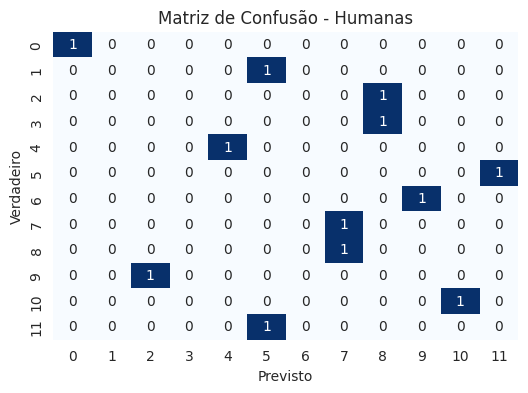

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Saude ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.17         6
   macro avg       0.17      0.17      0.17         6
weighted avg       0.17      0.17      0.17         6

Área Sob a Curva ROC (AUC): 0.5833


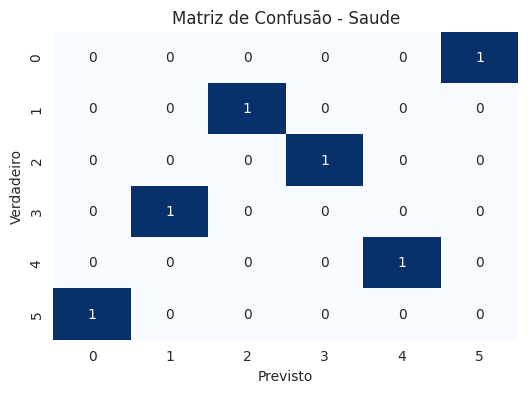

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Biologicas ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.29         7
   macro avg       0.18      0.29      0.20         7
weighted avg       0.18      0.29      0.20         7

Área Sob a Curva ROC (AUC): 0.8571


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

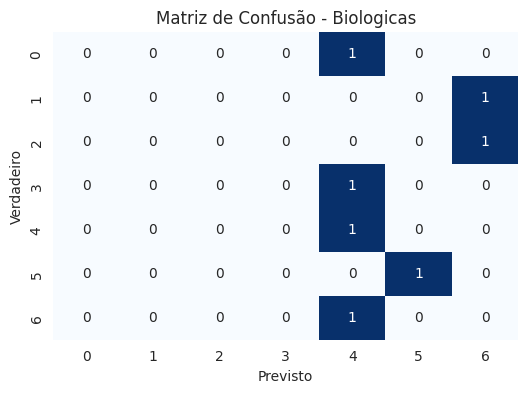

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Exatas ---


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(



Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.33      1.00      0.50         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1

    accuracy                           0.55        11
   macro avg       0.39      0.55      0.44        11
weighted avg       0.39      0.55      0.44        11

Não foi possível calcular o AUC: Number of classes in y_true not equal to the number of columns in 'y_score'


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

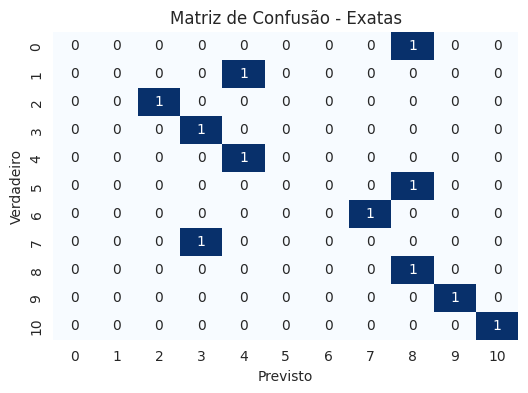

/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1201: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Tecnologia ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       6.0
   macro avg       0.00      0.00      0.00       6.0
weighted avg       0.00      0.00      0.00       6.0

Área Sob a Curva ROC (AUC): 0.4667


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

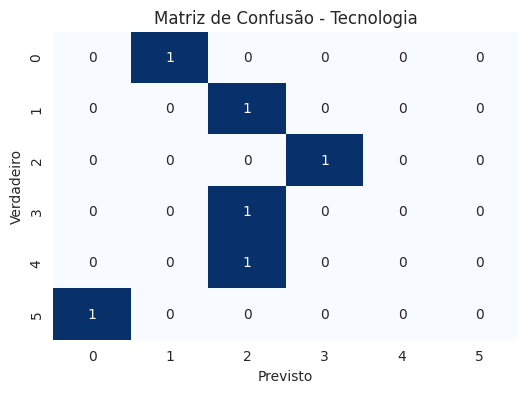

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Artes ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.30        10
   macro avg       0.25      0.30      0.27        10
weighted avg       0.25      0.30      0.27        10

Área Sob a Curva ROC (AUC): 0.8500


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

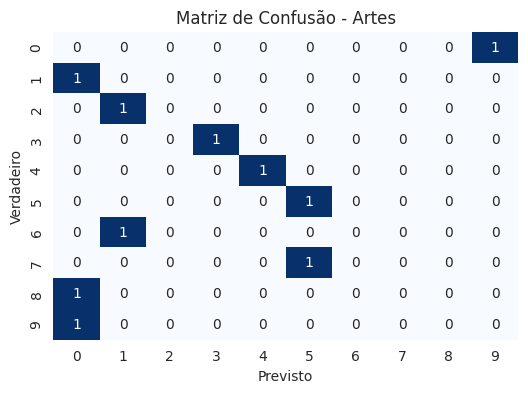

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Linguagens ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Não foi possível calcular o AUC: y should be a 1d array, got an array of shape (2, 2) instead.


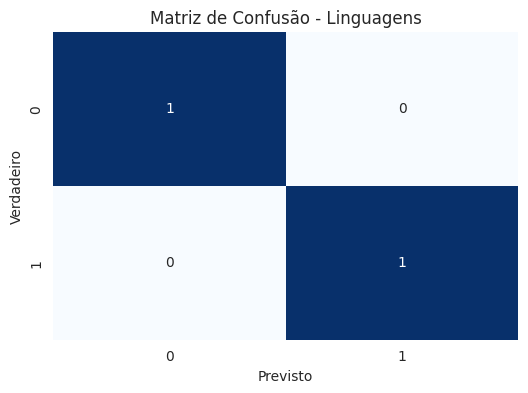

--------------------------------------------------

--- Treinando e Avaliando Modelo da Área de Comunicacao ---

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.38      0.50      0.42         4
weighted avg       0.38      0.50      0.42         4

Área Sob a Curva ROC (AUC): 0.9167


/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/nicolas/.local/share/virtualenvs/NCJNet-xGDSlkFY/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

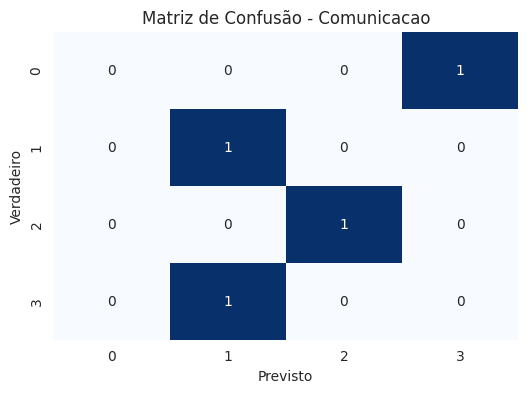

--------------------------------------------------



In [68]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#dicionário com os melhores modelos por área
models = {
    "Humanas": modelos_por_area['Humanas']['model'],
    "Saude": modelos_por_area['Saude']['model'],
    "Biologicas": modelos_por_area['Biologicas']['model'],
    "Exatas": modelos_por_area['Exatas']['model'],
    "Tecnologia": modelos_por_area['Tecnologia']['model'],
    "Artes": modelos_por_area['Artes']['model'],
    "Linguagens": modelos_por_area['Linguagens']['model'],
    "Comunicacao": modelos_por_area['Comunicacao']['model']
}

#dicionário para armazenar os resultados e as curvas ROC
results = {}
roc_curves = {}

#loop para treinar e avaliar cada modelo
for name, model in models.items():
    print(f"--- Treinando e Avaliando Modelo da Área de {name} ---")
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    
    for train, test in kf.split(utils[name]["X"], utils[name]["y"]):
        
        X_train_fold, X_test_fold = utils[name]["X"].iloc[train], utils[name]["X"].iloc[test] 
        y_train_fold, y_test_fold = utils[name]["y"][train], utils[name]["y"][test] 
        
        # Normalização dos dados
        X_train_normalizado = scaler.fit_transform(X_train_fold)
        X_test_normalizado = scaler.transform(X_test_fold)

        #Treina o modelo com esse conjunto de treinamento
        model.fit(X_train_normalizado, y_train_fold)
            
        # Predições
        y_test_pred = model.predict(X_test_normalizado)
        y_proba = model.predict_proba(X_test_normalizado)  # Probabilidades para todas as classes

        acc_scores.append(accuracy_score(y_test_fold, y_test_pred))
        
    if np.max(acc_scores) > modelos_por_area[area]["acc"]:
        modelos_por_area[area]["model"] = rf_model
        modelos_por_area[area]["acc"] = np.max(acc_scores)
    
    # --- métricas ---
    
    #reporte de Classificação (Precisão, Revocação, F1-Score)
    print("\nRelatório de Classificação:")
    report = classification_report(y_test_fold, y_test_pred)
    print(report)
    
    #F1-Score Macro 
    f1_macro = f1_score(y_test_fold, y_test_pred, average='macro')
    
    #AUC (multi-class)
    try:
        auc = roc_auc_score(y_test_fold, y_proba, multi_class='ovr')
        print(f"Área Sob a Curva ROC (AUC): {auc:.4f}")
    except Exception as e:
        auc = None
        print(f"Não foi possível calcular o AUC: {e}")
    
    #armazenando os resultados para o DataFrame final
    results[name] = {
        'Precision (Macro)': f1_score(y_test_fold, y_test_pred, average='macro'),
        'Recall (Macro)': f1_score(y_test_fold, y_test_pred, average='macro'), #recall macro = Precision macro para F1
        'F1-Score (Macro)': f1_macro,
        'AUC': auc
    }
    
    # --- matriz de Confusão ---
    cm = confusion_matrix(y_test_fold, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {name}')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()
    
    from sklearn.preprocessing import label_binarize
    
    # Get the number of classes from the model if possible, else from y_test_fold
    if hasattr(model, "classes_"):
        n_classes = len(model.classes_)
    else:
        n_classes = len(np.unique(np.concatenate([y_test_fold, y_test_pred])))
    
    # Defensive: pad y_proba if it has only one column (single class predicted)
    if y_proba.shape[1] != n_classes:
        # Create a full probability array with zeros
        y_proba_full = np.zeros((y_proba.shape[0], n_classes))
        # Find the predicted class index
        if hasattr(model, "classes_"):
            class_indices = {c: i for i, c in enumerate(model.classes_)}
            for idx, c in enumerate(model.classes_):
                y_proba_full[:, c] = y_proba[:, idx]
        else:
            # fallback: just fill the first column
            y_proba_full[:, 0] = y_proba[:, 0]
        y_proba = y_proba_full
    
    y_test_bin = label_binarize(y_test_fold, classes=np.arange(n_classes))
    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        try:
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        except Exception:
            fpr[i], tpr[i] = np.array([0, 1]), np.array([0, 1])  # fallback for degenerate cases
    roc_curves[name] = {'fpr': fpr, 'tpr': tpr, 'auc': auc}
    
    print("-" * 50 + "\n")

Humanas


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


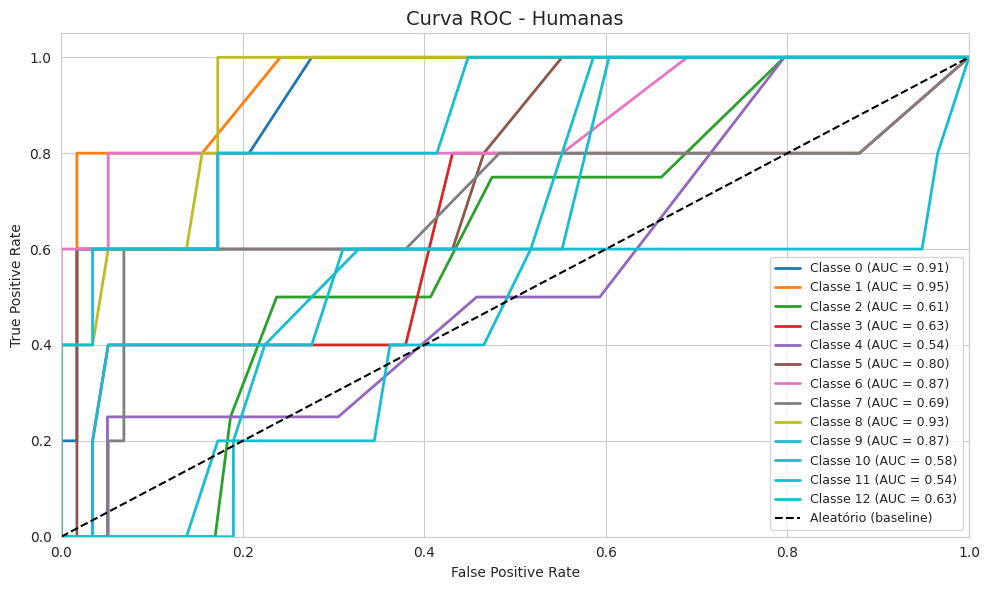

Artes


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


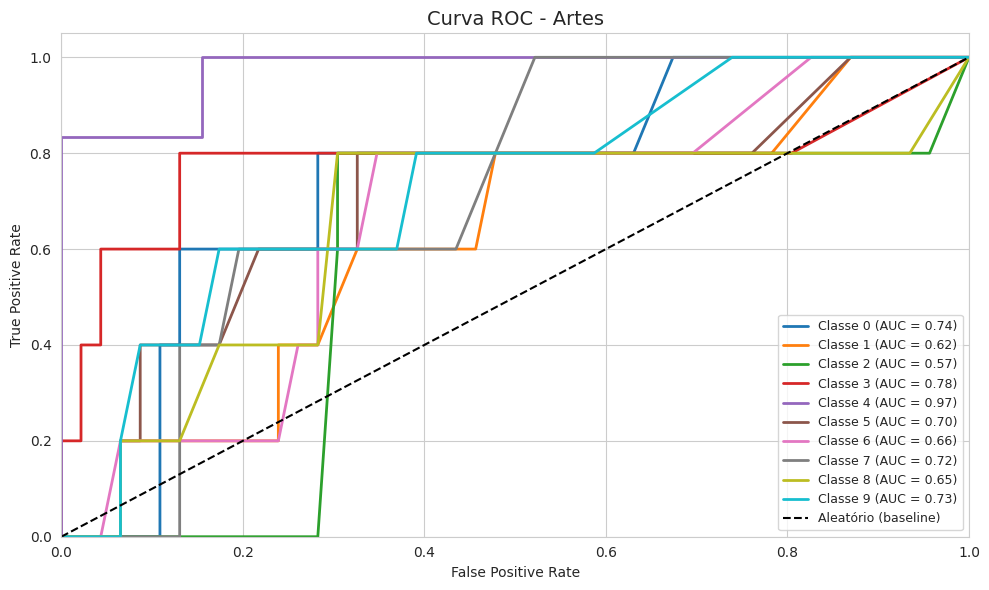

Linguagens
Biologicas


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


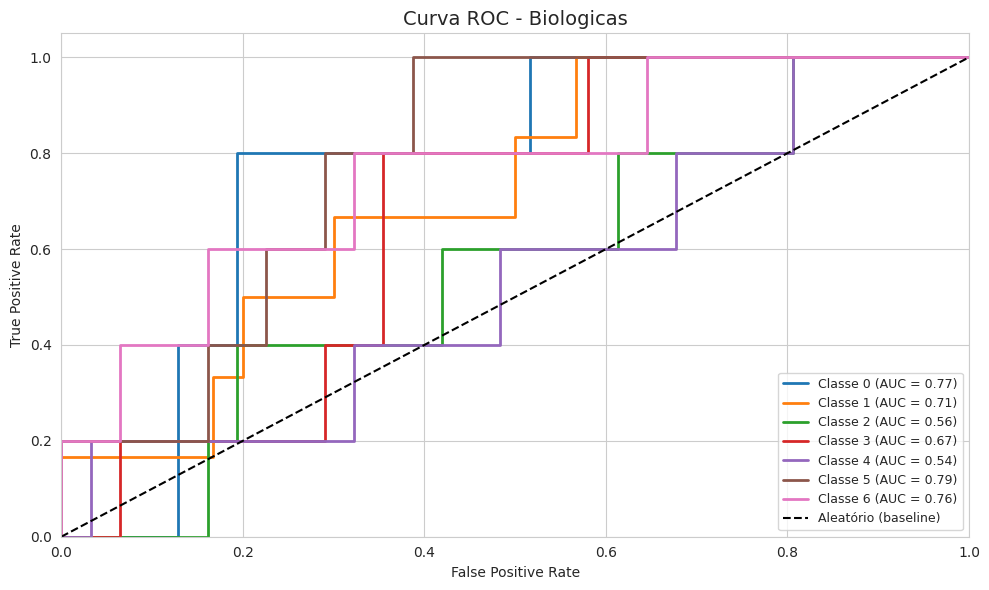

Saude


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


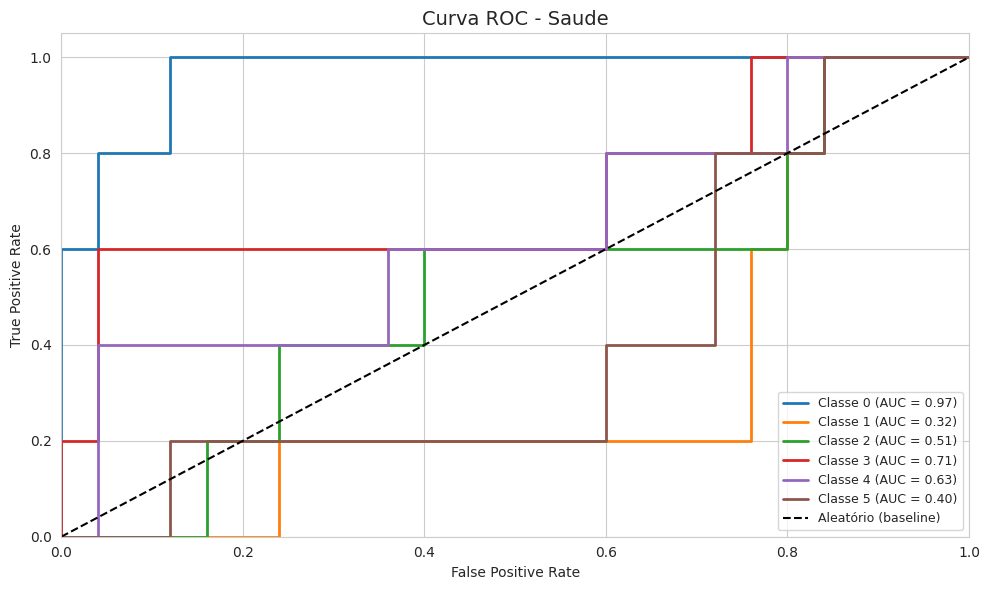

Tecnologia


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


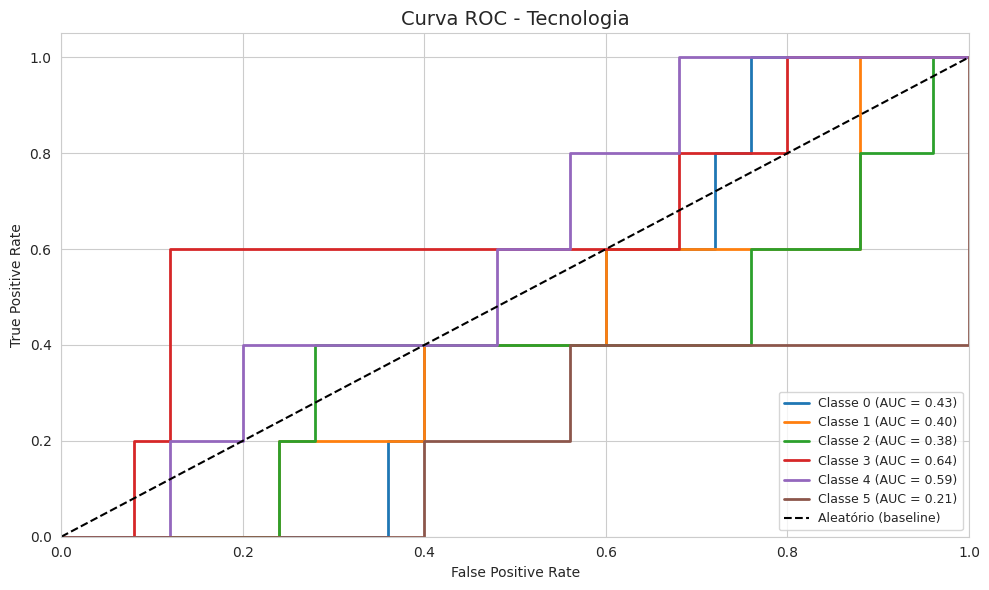

Exatas


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


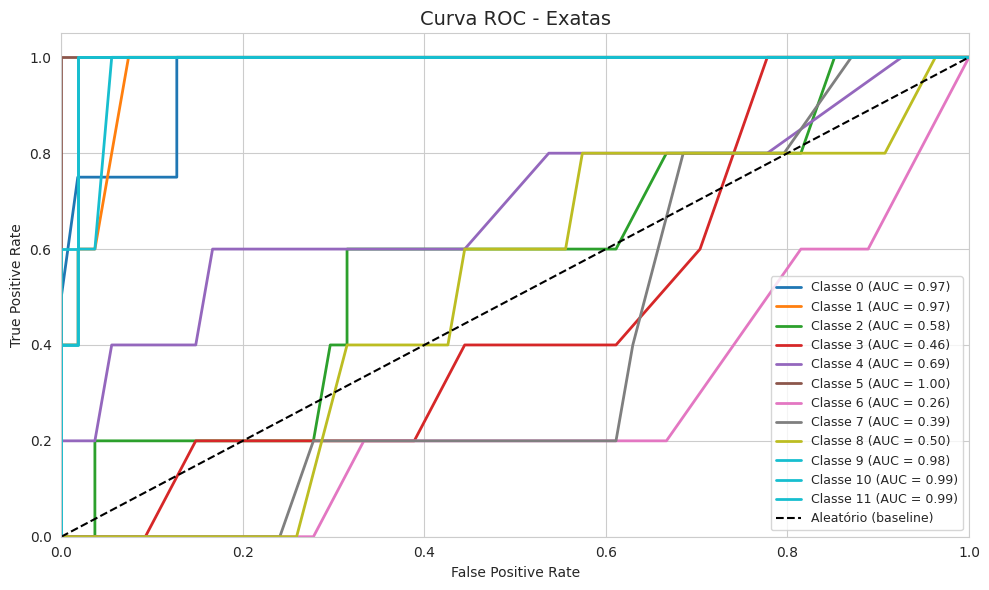

Comunicacao


/tmp/ipykernel_202429/1293180418.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


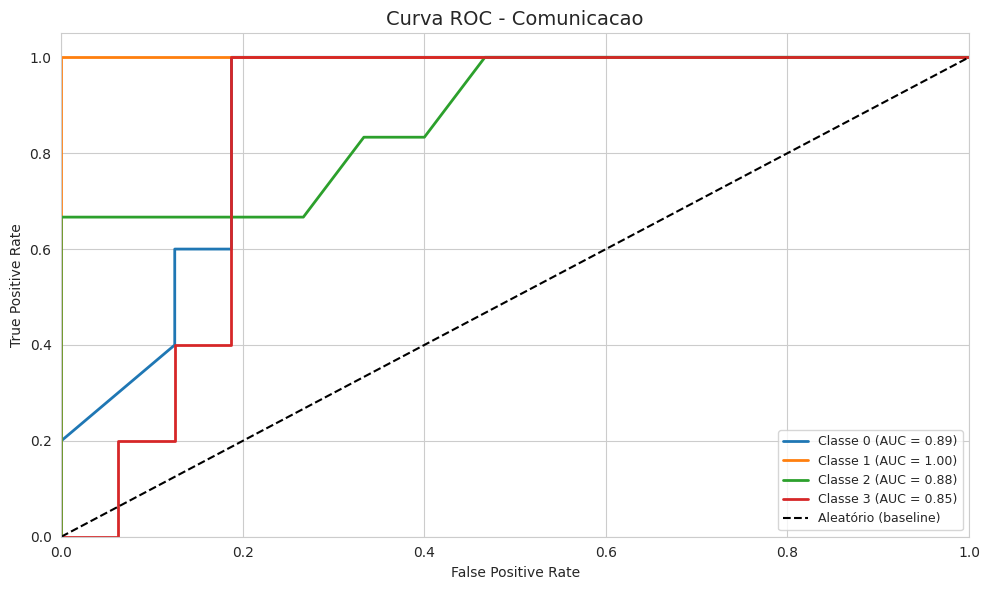

In [79]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

for area in areas_unicas:
    area = area.strip()  # Certifique-se de que a área não tenha espaços extras
    print(area)
    if area == "Linguagens":
        continue
    # Certifique-se que essas listas estejam preenchidas com os dados de todos os folds (como você já fez)
    y_true = np.array(modelos_por_area[area]['true_labels'])
    y_proba = np.array(modelos_por_area[area]['predict_proba'])

    # Binarizar os rótulos
    classes = np.unique(y_true)
    n_classes = len(classes)
    y_true_bin = label_binarize(y_true, classes=classes)
    

    # Calcular FPR, TPR e AUC por classe
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot
    plt.figure(figsize=(10, 6))
    colors = get_cmap('tab10')

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                color=colors(i),
                lw=2,
                label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Aleatório (baseline)')

    plt.title(f'Curva ROC - {area}', fontsize=14)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(True)
    plt.legend(loc='lower right', fontsize=9)
    plt.tight_layout()

    # Salvar e mostrar
    plt.savefig('./imagens/roc_randomforest_global_cv.png', dpi=300, bbox_inches='tight')
    plt.show()


Melhor modelo no geral: Comunicacao (AUC = 1.0000)


/tmp/ipykernel_202429/800968240.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = get_cmap('tab10')


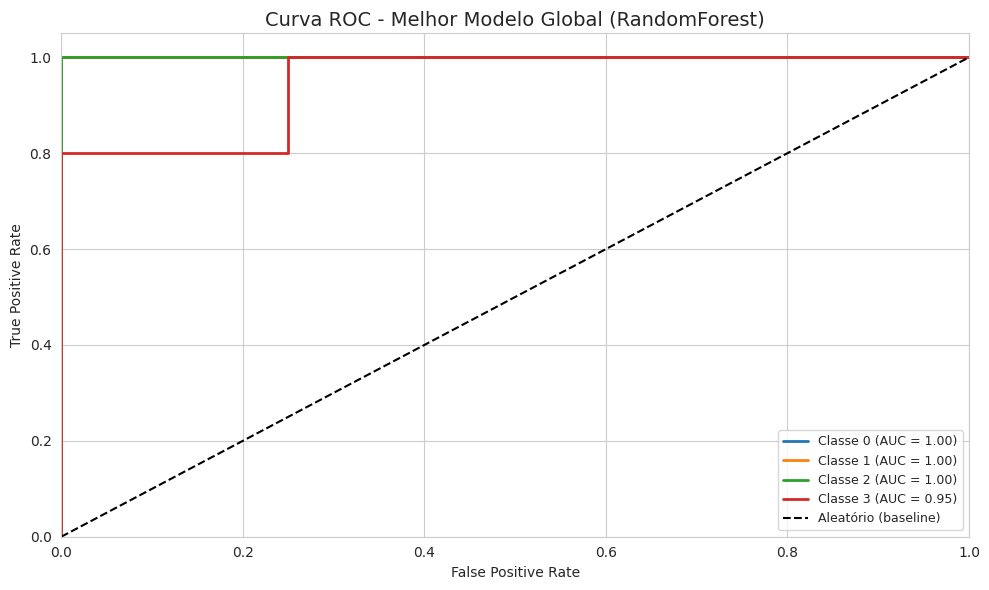

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from matplotlib.cm import get_cmap

# Encontrar a área com maior AUC
melhor_area = max(results, key=lambda k: results[k]['AUC'] if results[k]['AUC'] is not None else 0)
print(f"Melhor modelo no geral: {melhor_area} (AUC = {results[melhor_area]['AUC']:.4f})")


# Dados do melhor modelo (ajuste para o seu caso se necessário)
best_rf_model = modelos_por_area[melhor_area]['model']
X = utils[melhor_area]['X']
y = utils[melhor_area]['y']

# Pré-processamento
X_norm = scaler.fit_transform(X)

# Predição
y_proba = best_rf_model.predict_proba(X_norm)

# Binarização dos rótulos para cálculo da curva ROC multiclasse
classes = np.unique(y)
n_classes = len(classes)
y_bin = label_binarize(y, classes=classes)

# Cálculo de FPR, TPR e AUC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- Plotagem do gráfico ROC ---
plt.figure(figsize=(10, 6))
colors = get_cmap('tab10')

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             color=colors(i),
             lw=2,
             label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

# Linha base aleatória
plt.plot([0, 1], [0, 1], 'k--', lw=1.5, label='Aleatório (baseline)')

# Estética
plt.title('Curva ROC - Melhor Modelo Global (RandomForest)', fontsize=14)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.legend(loc='lower right', fontsize=9, frameon=True)
plt.tight_layout()

# Salvar e exibir
plt.savefig('./imagens/roc_randomforest_global.png', dpi=300, bbox_inches='tight')
plt.show()


Melhor modelo no geral: Comunicacao (AUC = 1.0000)


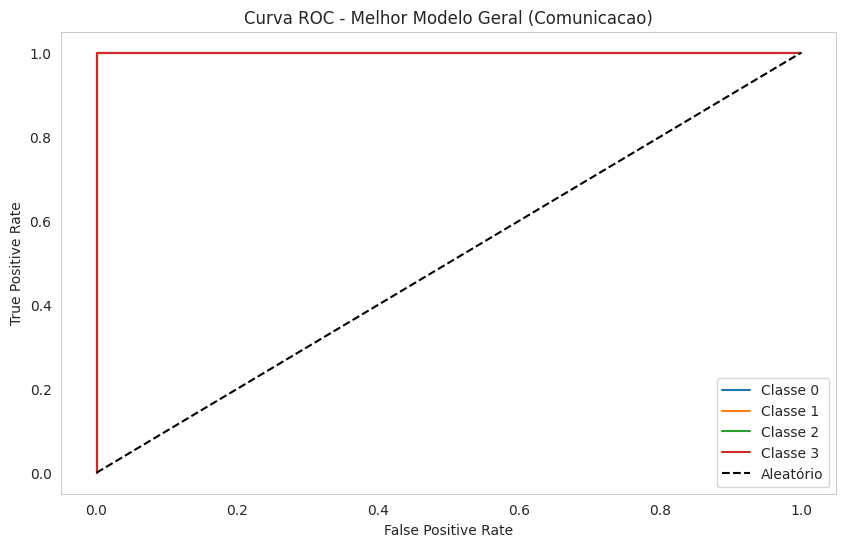

In [ ]:
# Encontrar a área com maior AUC
melhor_area = max(results, key=lambda k: results[k]['AUC'] if results[k]['AUC'] is not None else 0)
print(f"Melhor modelo no geral: {melhor_area} (AUC = {results[melhor_area]['AUC']:.4f})")

# Pegar a curva ROC correspondente
roc_data = roc_curves[melhor_area]

# Plotar curvas ROC por classe
plt.figure(figsize=(10, 6))
for i in roc_data['fpr']:
    plt.plot(roc_data['fpr'][i], roc_data['tpr'][i], label=f'Classe {i}')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.title(f'Curva ROC - Melhor Modelo Geral ({melhor_area})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()

# Salvar o gráfico
plt.savefig(f'./imagens/roc_{melhor_area.lower()}.png', dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()
